In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 

df_fig2d = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2d", index_col=0)
df_fig2d.head(2)

,natural,GCVAE,RfamGen
rfam,,,
RF00001,81.115,140.108,173.546
RF00002,99.078,175.398,232.016


In [8]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    df_fig2d["RfamGen"] - df_fig2d["natural"],
    df_fig2d["GCVAE"] - df_fig2d["natural"],
    alternative="greater"
)

MannwhitneyuResult(statistic=230018.5, pvalue=1.634996624396525e-07)

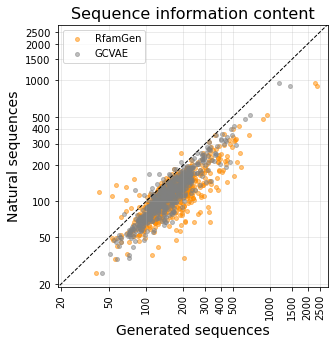

In [11]:
import numpy as np

color_gcvae = "gray"    
color_cmvae = "darkorange"
alpha = 0.5
xmin = 4.3
xmax = 11.5
size = 16

ticks = [20 ,50, 100, 200, 300, 400]+[500*i for i in range(1, 6)]

fig, ax1 = plt.subplots(figsize = (5, 5))
ax1.plot([-100, 100], [-100, 100], color = "black", linestyle = "dashed", linewidth =1)
ax1.scatter(
    np.log2(df_fig2d["RfamGen"]+1),
    np.log2(df_fig2d["natural"]+1),
    alpha = alpha, label ="RfamGen", s = size, color = color_cmvae)
ax1.scatter(
    np.log2(df_fig2d["GCVAE"]+1),
    np.log2(df_fig2d["natural"]+1),
    alpha = alpha, label = "GCVAE", s = size, color = color_gcvae)


plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)
plt.yticks([np.log2(t+1) for t in ticks], ticks)
plt.title("Sequence information content", fontsize = 16)
plt.xlabel("Generated sequences", fontsize = 14)
plt.ylabel("Natural sequences", fontsize = 14)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(xmin, xmax)
ax1.legend()
ax1.grid(alpha = 0.3)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.savefig("./figure2d.pdf")